# Android Apps' Reviews NLP 

### Libraries import

In [3]:
# for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

C:\Users\Maria\AppData\Local\Temp\ipykernel_624\3135724318.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# for models
import spacy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Initial Data Analysis

In [5]:
df = pd.read_csv('data/user_reviews.csv')

In [6]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
df.shape

(64295, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [9]:
df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [10]:
df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

### Data Preprocessing

#### NaN Replacement

In [11]:
df[df['Translated_Review'].isnull()].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN


In [12]:
df.dropna(how='any', inplace=True)

df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [13]:
df.shape

(37427, 5)

#### Text Data Preprocessing

In [14]:
# Выбор только необходимых столбцов
text_data = df[['Translated_Review']]

In [15]:
# !python -m spacy download en_core_web_sm

In [16]:
# Предварительная обработка текста
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(tokens)

df['processed_review'] = df['Translated_Review'].apply(preprocess)

# Пример данных после предварительной обработки
print(df['processed_review'].head())

0    like eat delicious food cook food case good fo...
1              help eat healthy exercise regular basis
3               work great especially go grocery store
4                                            good idea
5                                             good way
Name: processed_review, dtype: object


In [17]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,processed_review
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,like eat delicious food cook food case good fo...
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,help eat healthy exercise regular basis
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,work great especially go grocery store
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,good idea
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,good way


In [18]:
from collections import Counter

dfs_by_app = dict(tuple(df.groupby('App')))
most_frequent_words = []

for df_name, df in dfs_by_app.items():
    # Получение всех слов
    all_words = ' '.join(df['processed_review']).split()
    
    # Частотность слов
    word_freq = Counter(all_words)
    
    # Топ-10 самых частых слов
    most_frequent_words.append((df_name, word_freq.most_common(10)))

### Data Visualizations

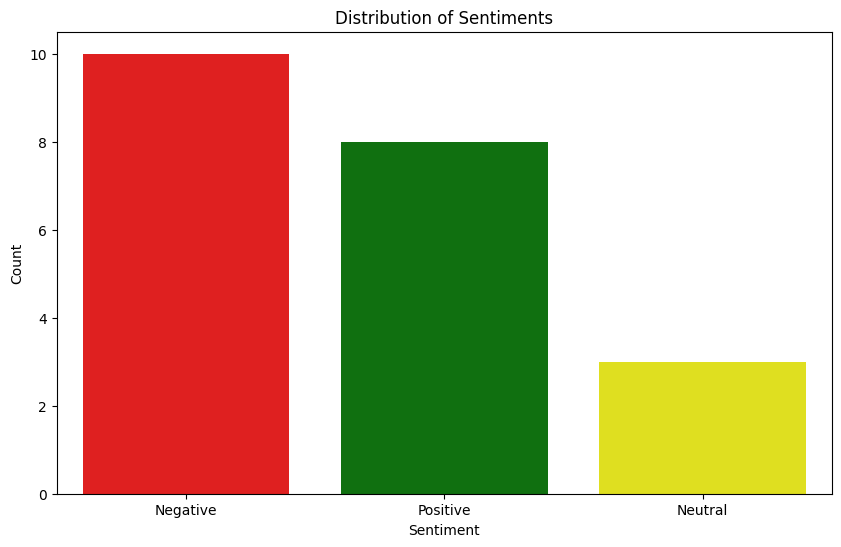

In [19]:
# Distribution of Sentiment
sentiment_distribution = df['Sentiment'].value_counts()

# Custom colors for each sentiment
colors = {'Positive': 'green', 'Neutral': 'yellow', 'Negative': 'red'}

plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, order=sentiment_distribution.index, hue='Sentiment', palette=colors, legend=False)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

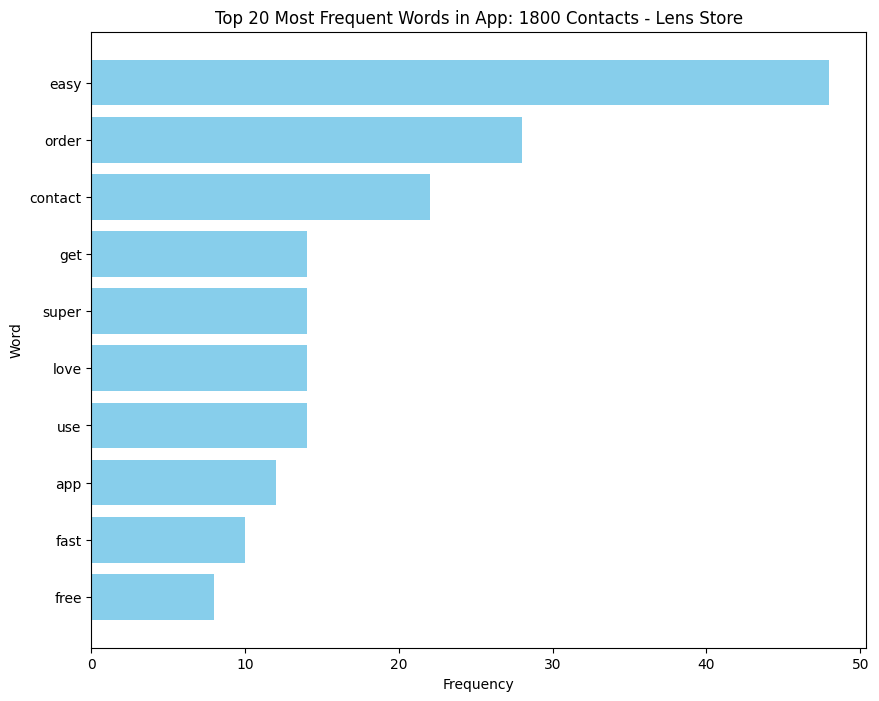

In [20]:
import matplotlib.pyplot as plt

# Преобразование частотности в DataFrame
word_freq_df = pd.DataFrame(most_frequent_words[3][1], columns=['word', 'count'])

# Построение графика
plt.figure(figsize=(10, 8))
plt.barh(word_freq_df['word'], word_freq_df['count'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title(f'Top 20 Most Frequent Words in App: {most_frequent_words[3][0]}')
plt.gca().invert_yaxis()
plt.show()

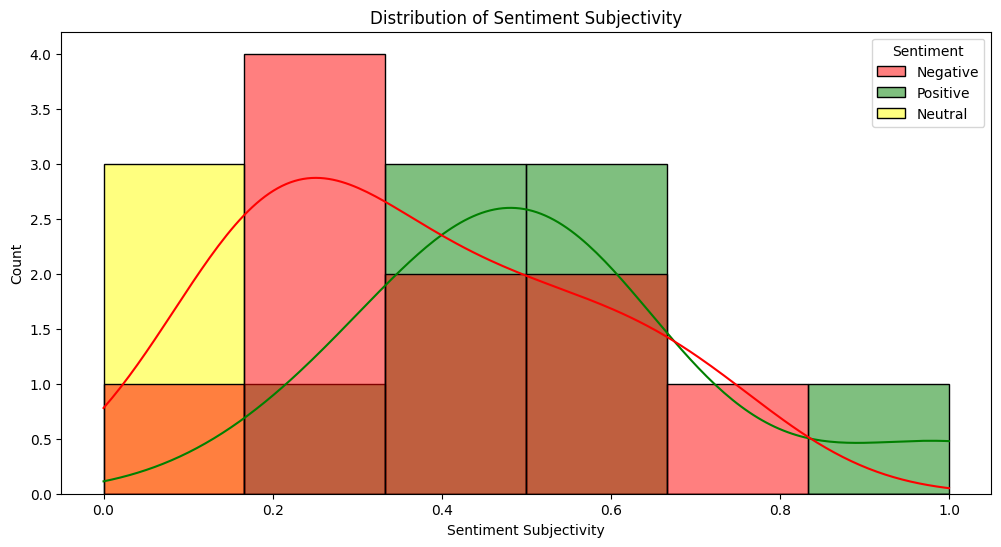

In [21]:
# Распределение субъективности
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Sentiment_Subjectivity', kde=True, hue='Sentiment', palette=colors)
plt.title('Distribution of Sentiment Subjectivity')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Count')
plt.show()

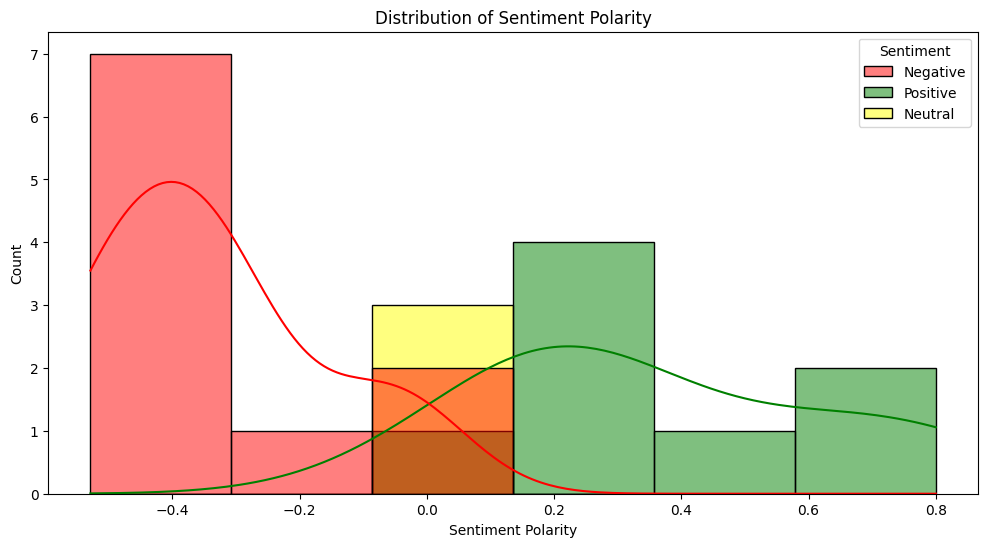

In [22]:
# Распределение полярности
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Sentiment_Polarity', kde=True, hue='Sentiment', palette=colors)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()

In [23]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


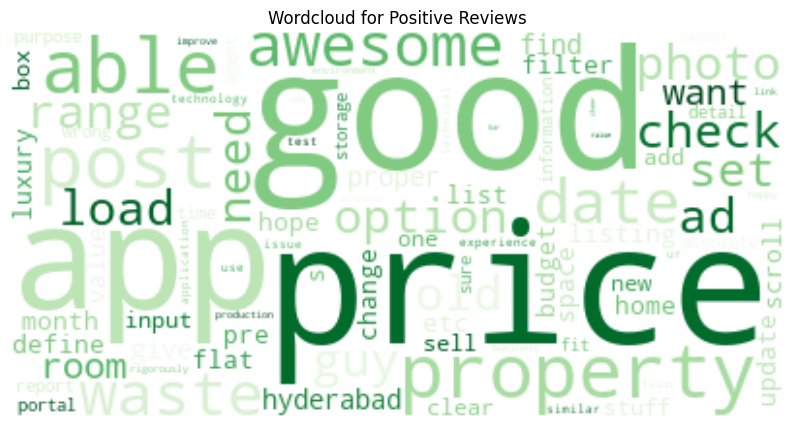

In [24]:
from wordcloud import WordCloud

# Wordcloud для положительных отзывов
positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['processed_review'])
positive_wordcloud = WordCloud(background_color='white', colormap='Greens').generate(positive_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Positive Reviews')
plt.show()

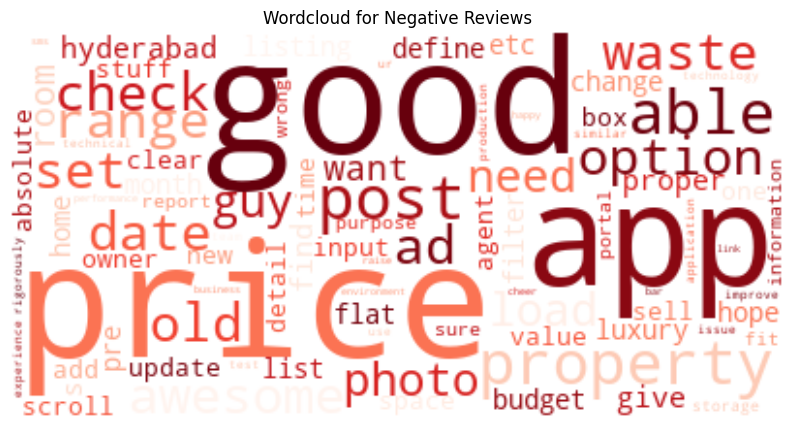

In [25]:
# Wordcloud для негативных отзывов
negative_reviews = ' '.join(df[df['Sentiment'] == 'Negative']['processed_review'])
negative_wordcloud = WordCloud(background_color='white', colormap='Reds').generate(positive_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Negative Reviews')
plt.show()

### Model Construction

In [40]:
import spacy

from sklearn.utils import resample
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [41]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df['processed_review'], df['Sentiment'], test_size=0.2, random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)

# Создание pipeline с TF-IDF и Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование и отчет
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

    Negative       0.40      1.00      0.57         2
    Positive       0.00      0.00      0.00         3

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



c:\Users\Maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [42]:
# Balancing classes for all categories (Negative, Neutral, Positive)
neutral = X_train[train_data['Sentiment'] == 'Neutral']

negative_upsampled = resample(negative, replace=True, n_samples=len(positive), random_state=42)
neutral_upsampled = resample(neutral, replace=True, n_samples=len(positive), random_state=42)

balanced_upsampled = pd.concat([positive, negative_upsampled, neutral_upsampled])

# Создание pipeline с TF-IDF и Logistic Regression
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('scaler', StandardScaler(with_mean=False)),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Обучение модели на сбалансированных данных
model.fit(balanced_upsampled['processed_review'], balanced_upsampled['Sentiment'])

# Прогнозирование и отчет
predictions = model.predict(X_test)
classification_report_result = classification_report(y_test, predictions, zero_division=0)

classification_report_result

NameError: name 'negative' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Создание pipeline с TF-IDF и Random Forest
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('scaler', StandardScaler(with_mean=False)),
    ('rf', RandomForestClassifier())
])

# Определение гиперпараметров для оптимизации
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Настройка GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

# Обучение модели на сбалансированных данных
grid_search.fit(balanced_upsampled['processed_review'], balanced_upsampled['Sentiment'])

# Прогнозирование и отчет
predictions = grid_search.predict(X_test)
classification_report_result = classification_report(y_test, predictions, zero_division=0)

print(classification_report_result)
print("Best parameters found: ", grid_search.best_params_)


NameError: name 'balanced_upsampled' is not defined